### Build and Train The Models (RNN, LSTM, GRU)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, RNN, SimpleRNN, LSTM, GRU, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# Step 1: Read the dataset
file_path = "data_table.csv" 
data = pd.read_csv(file_path)

# Step 2: Data preprocessing

# Select necessary features
selected_features = [
    'Orders', 'temperature_2m...C.', 'precipitation..mm.', 'rain..mm.', 'Friday', 'Saturday', 'Sunday', 'Monday', 
    'Tuesday', 'Wednesday', 'Thursday','hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9',
    'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
    'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23'
]

data = data[selected_features]

# Normalize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 3: Generate sequences
def create_sequences(data, target_column_index, n_steps=4):
    X, y = [], []
    for i in range(len(data) - n_steps):
        # Use all features for inputs
        X.append(data[i:i+n_steps])
        # Use only the target column ('Orders') for the output
        y.append(data[i+n_steps, target_column_index])
    return np.array(X), np.array(y)

# Define the target column index (0 corresponds to 'Orders')
target_column_index = 0
n_steps = 4  # Using the past 4 hours
output_steps = 1 

X, y = create_sequences(data_scaled, target_column_index, n_steps)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 5: Build and train models
def build_model(model_type, input_shape):
    model = Sequential()
    if model_type == 'RNN':
        model.add(SimpleRNN(50, activation='relu', return_sequences=False, input_shape=input_shape))
    elif model_type == 'LSTM':
        model.add(LSTM(50, activation='relu', return_sequences=False, input_shape=input_shape))
    elif model_type == 'GRU':
        model.add(GRU(50, activation='relu', return_sequences=False, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(output_steps))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Define the input shape
input_shape = (X_train.shape[1], X_train.shape[2])

# Build models
rnn_model = build_model('RNN', input_shape)
lstm_model = build_model('LSTM', input_shape)
gru_model = build_model('GRU', input_shape)

# Step 6: Train the models
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train RNN
history_rnn = rnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)

# Train LSTM
history_lstm = lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)

# Train GRU
history_gru = gru_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)

# Step 7: Evaluate the models
rnn_loss, rnn_mae = rnn_model.evaluate(X_test, y_test, verbose=0)
lstm_loss, lstm_mae = lstm_model.evaluate(X_test, y_test, verbose=0)
gru_loss, gru_mae = gru_model.evaluate(X_test, y_test, verbose=0)

print(f"Model Evaluation Results:\nRNN: Loss={rnn_loss:.4f}, MAE={rnn_mae:.4f}\nLSTM: Loss={lstm_loss:.4f}, MAE={lstm_mae:.4f}\nGRU: Loss={gru_loss:.4f}, MAE={gru_mae:.4f}")

# Step 8: Choose the best model based on evaluation
best_model_type = min((rnn_mae, 'RNN'), (lstm_mae, 'LSTM'), (gru_mae, 'GRU'))[1]
print(f"The best model is: {best_model_type}")



c:\Users\marya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 1.0800 - mae: 0.7867 - val_loss: 0.1667 - val_mae: 0.3109
Epoch 2/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2960 - mae: 0.4186 - val_loss: 0.1251 - val_mae: 0.2660
Epoch 3/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2039 - mae: 0.3530 - val_loss: 0.1021 - val_mae: 0.2438
Epoch 4/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1689 - mae: 0.3206 - val_loss: 0.0877 - val_mae: 0.2280
Epoch 5/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1497 - mae: 0.3049 - val_loss: 0.0863 - val_mae: 0.2247
Epoch 6/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1277 - mae: 0.2769 - val_loss: 0.0755 - val_mae: 0.2114
Epoch 7/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1122 - mae: 0.2629 - val_loss: 0.0844 - val_mae: 0.2247
Epoch 8/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1089 - mae: 0.2569 - val_loss: 0.0686 - val_mae: 0.1995
Epoch 9/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

### Prediction and Visualization 

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
RMSE Results:
RNN: 0.2350
LSTM: 0.2364
GRU: 0.2278
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R² Results:
RNN: 0.9319
LSTM: 0.9311
GRU: 0.9360
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


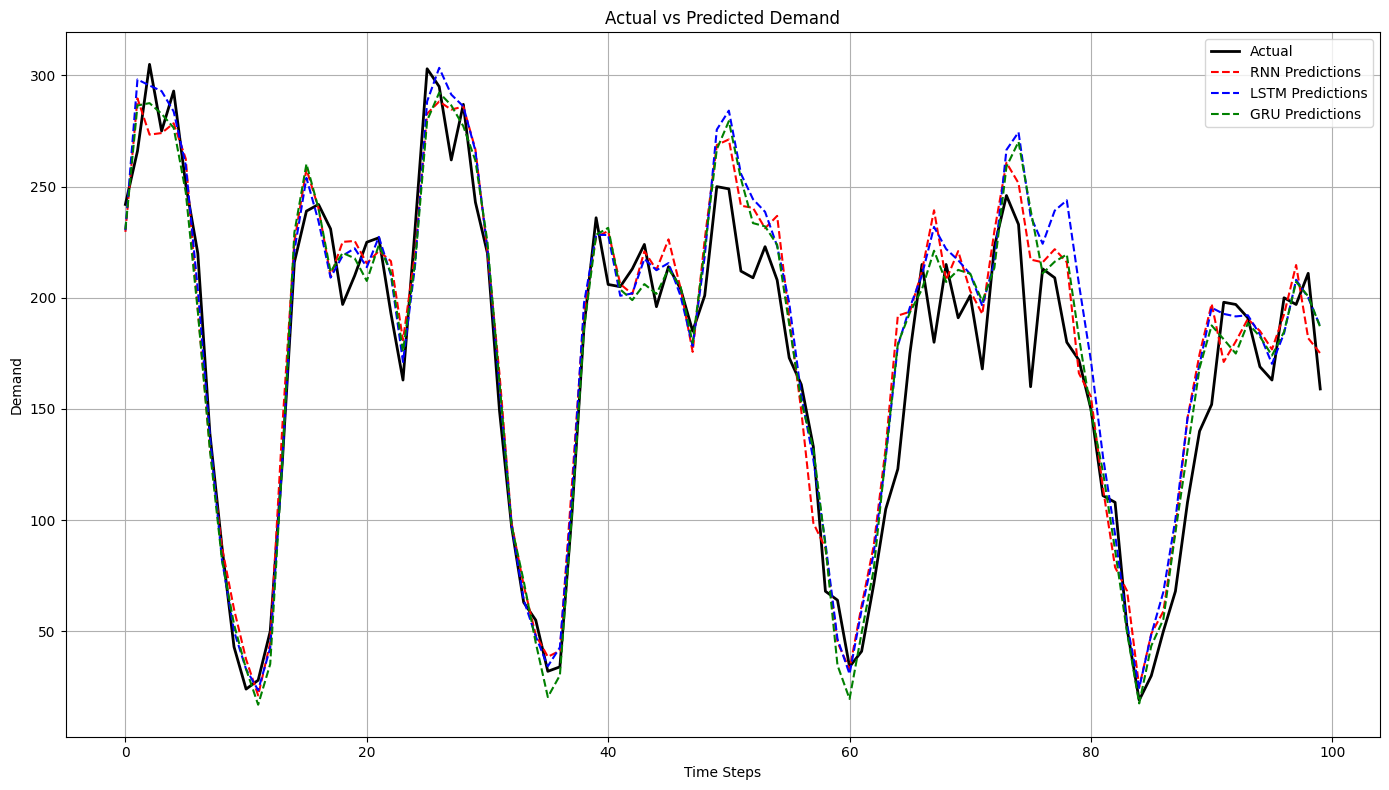

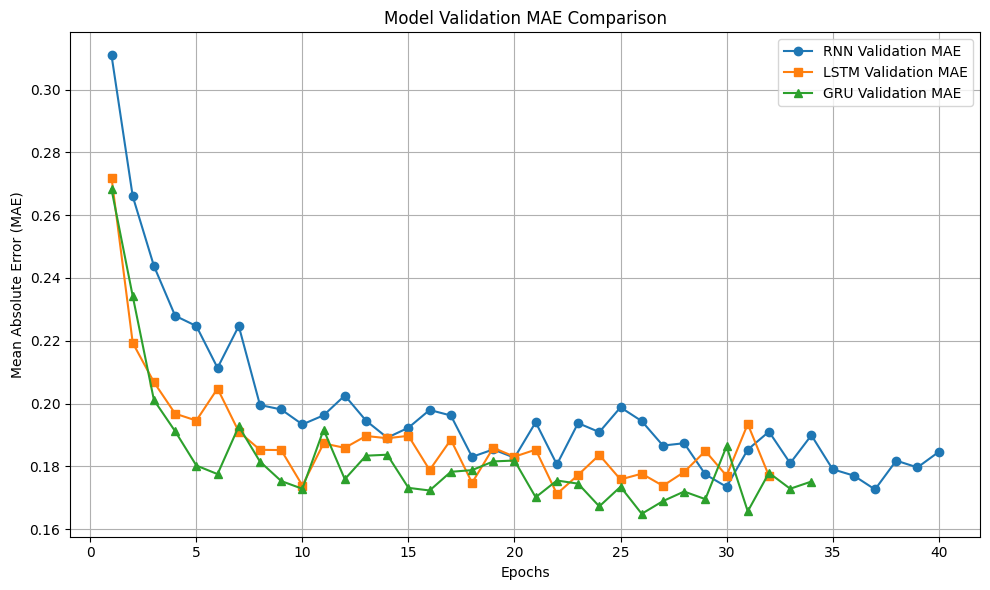

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

rnn_rmse = np.sqrt(mean_squared_error(y_test, rnn_model.predict(X_test)))
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_model.predict(X_test)))
gru_rmse = np.sqrt(mean_squared_error(y_test, gru_model.predict(X_test)))

print(f"RMSE Results:\nRNN: {rnn_rmse:.4f}\nLSTM: {lstm_rmse:.4f}\nGRU: {gru_rmse:.4f}")

rnn_r2 = r2_score(y_test, rnn_model.predict(X_test))
lstm_r2 = r2_score(y_test, lstm_model.predict(X_test))
gru_r2 = r2_score(y_test, gru_model.predict(X_test))

print(f"R² Results:\nRNN: {rnn_r2:.4f}\nLSTM: {lstm_r2:.4f}\nGRU: {gru_r2:.4f}")

# prediction 
predicted_rnn = rnn_model.predict(X_test)
predicted_lstm = lstm_model.predict(X_test)
predicted_gru = gru_model.predict(X_test)

# Convert predictions back to original scale
predicted_rnn = scaler.inverse_transform(np.hstack([predicted_rnn, np.zeros((predicted_rnn.shape[0], data_scaled.shape[1] - 1))]))[:, target_column_index]
predicted_lstm = scaler.inverse_transform(np.hstack([predicted_lstm, np.zeros((predicted_lstm.shape[0], data_scaled.shape[1] - 1))]))[:, target_column_index]
predicted_gru = scaler.inverse_transform(np.hstack([predicted_gru, np.zeros((predicted_gru.shape[0], data_scaled.shape[1] - 1))]))[:, target_column_index]
y_test_original = scaler.inverse_transform(np.hstack([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], data_scaled.shape[1] - 1))]))[:, target_column_index]


# Plotting actual vs predicted values
plt.figure(figsize=(14, 8))
plt.plot(y_test_original[:100], label='Actual', color='black', linewidth=2)
plt.plot(predicted_rnn[:100], label='RNN Predictions', linestyle='--', color='red')
plt.plot(predicted_lstm[:100], label='LSTM Predictions', linestyle='--', color='blue')
plt.plot(predicted_gru[:100], label='GRU Predictions', linestyle='--', color='green')

plt.title('Actual vs Predicted Demand')
plt.xlabel('Time Steps')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Plotting model performance
plt.figure(figsize=(10, 6))
epochs_rnn = range(1, len(history_rnn.history['loss']) + 1)
epochs_lstm = range(1, len(history_lstm.history['loss']) + 1)
epochs_gru = range(1, len(history_gru.history['loss']) + 1)

plt.plot(epochs_rnn, history_rnn.history['val_mae'], label='RNN Validation MAE', marker='o')
plt.plot(epochs_lstm, history_lstm.history['val_mae'], label='LSTM Validation MAE', marker='s')
plt.plot(epochs_gru, history_gru.history['val_mae'], label='GRU Validation MAE', marker='^')

plt.title('Model Validation MAE Comparison')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

